# Name: Ojei Victory
# Student Number: 202137995
# Module Name: Fundamentals of Data Science 771766_A24_T1


## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

census_data = pd.read_csv("T1_A24census5.csv")
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Smith Road,Zoe,Davies,43,Head,Married,Female,Illustrator,NaN,Christian
1,1,Smith Road,Colin,Davies,45,Husband,Married,Male,"Engineer, chemical",NaN,Christian
2,1,Smith Road,Kathleen,Davies,5,Daughter,NaN,Female,Student,NaN,Christian
3,2,Smith Road,Daniel,Jones,89,Head,Married,Male,Retired Archaeologist,NaN,Christian
4,2,Smith Road,Denise,Jones,87,Wife,Married,Female,Retired Art gallery manager,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8013,1,Albion Barn,Chloe,Williams,13,Daughter,NaN,Female,Student,NaN,Christian
8014,1,Albion Barn,Trevor,Williams,12,Son,NaN,Male,Student,NaN,Christian
8015,1,Albion Barn,Laura,Williams,9,Daughter,NaN,Female,Student,NaN,No Religion
8016,1,Albion Barn,Joyce,Williams,6,Daughter,NaN,Female,Student,NaN,Christian


In [2]:
census_data.to_csv("census_data_cleaned.csv", index=False)

In [3]:
census_data_cleaned = pd.read_csv("census_data_cleaned.csv")
census_data_cleaned

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Smith Road,Zoe,Davies,43,Head,Married,Female,Illustrator,NaN,Christian
1,1,Smith Road,Colin,Davies,45,Husband,Married,Male,"Engineer, chemical",NaN,Christian
2,1,Smith Road,Kathleen,Davies,5,Daughter,NaN,Female,Student,NaN,Christian
3,2,Smith Road,Daniel,Jones,89,Head,Married,Male,Retired Archaeologist,NaN,Christian
4,2,Smith Road,Denise,Jones,87,Wife,Married,Female,Retired Art gallery manager,NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...
8013,1,Albion Barn,Chloe,Williams,13,Daughter,NaN,Female,Student,NaN,Christian
8014,1,Albion Barn,Trevor,Williams,12,Son,NaN,Male,Student,NaN,Christian
8015,1,Albion Barn,Laura,Williams,9,Daughter,NaN,Female,Student,NaN,No Religion
8016,1,Albion Barn,Joyce,Williams,6,Daughter,NaN,Female,Student,NaN,Christian


In [4]:
census_data_cleaned.info()
census_data_cleaned.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8018 entries, 0 to 8017
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8018 non-null   int64 
 1   Street                         8018 non-null   object
 2   First Name                     8018 non-null   object
 3   Surname                        8006 non-null   object
 4   Age                            8018 non-null   int64 
 5   Relationship to Head of House  7434 non-null   object
 6   Marital Status                 6206 non-null   object
 7   Gender                         8018 non-null   object
 8   Occupation                     8018 non-null   object
 9   Infirmity                      103 non-null    object
 10  Religion                       7095 non-null   object
dtypes: int64(2), object(9)
memory usage: 689.2+ KB


House Number                        0
Street                              0
First Name                          0
Surname                            12
Age                                 0
Relationship to Head of House     584
Marital Status                   1812
Gender                              0
Occupation                          0
Infirmity                        7915
Religion                          923
dtype: int64

In [5]:
# Fill missing surnames with 'Unknown'
census_data_cleaned['Surname'].fillna('Unknown', inplace=True)

# Fill missing marital statuses with logic:
# Assign 'N/A' for individuals under 18
census_data_cleaned['Marital Status'] = census_data_cleaned.apply(
    lambda row: 'N/A' if pd.isnull(row['Marital Status']) and row['Age'] < 18 else row['Marital Status'], axis=1
)

# Fill remaining missing marital statuses with 'Unknown'
census_data_cleaned['Marital Status'].fillna('Unknown', inplace=True)

# Fill missing religion with 'Not Stated'
census_data_cleaned['Religion'].fillna('Not Stated', inplace=True)

# Verify the changes
census_data_cleaned.info(), census_data_cleaned.isnull().sum()


C:\Users\Ojei Victory\AppData\Local\Temp\ipykernel_24524\384497230.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  census_data_cleaned['Surname'].fillna('Unknown', inplace=True)
C:\Users\Ojei Victory\AppData\Local\Temp\ipykernel_24524\384497230.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8018 entries, 0 to 8017
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8018 non-null   int64 
 1   Street                         8018 non-null   object
 2   First Name                     8018 non-null   object
 3   Surname                        8018 non-null   object
 4   Age                            8018 non-null   int64 
 5   Relationship to Head of House  7434 non-null   object
 6   Marital Status                 8018 non-null   object
 7   Gender                         8018 non-null   object
 8   Occupation                     8018 non-null   object
 9   Infirmity                      103 non-null    object
 10  Religion                       8018 non-null   object
dtypes: int64(2), object(9)
memory usage: 689.2+ KB


(None,
 House Number                        0
 Street                              0
 First Name                          0
 Surname                             0
 Age                                 0
 Relationship to Head of House     584
 Marital Status                      0
 Gender                              0
 Occupation                          0
 Infirmity                        7915
 Religion                            0
 dtype: int64)

In [6]:
# Identify individuals with potentially false ages (e.g., negative values or outliers)
# Adjust this condition based on what is considered a false age
false_age_condition = (census_data['Age'] < 0) | (census_data['Age'] > 122)

# Correct false ages based on the mean age of individuals with the same occupation
for index, row in census_data[false_age_condition].iterrows():
    occupation = row['Occupation']
    # Calculate mean age for individuals with the same occupation
    mean_age = census_data[census_data['Occupation'] == occupation]['Age'].mean()
    
    # Assign the mean age to the false age record
    census_data.at[index, 'Age'] = round(mean_age)

# Verify the changes
print("Updated Census Data with corrected ages:")
print(census_data[false_age_condition])

Updated Census Data with corrected ages:
      House Number         Street First Name Surname  Age  \
2704            13  Hart Junction       Rhys     NaN  100   

     Relationship to Head of House Marital Status Gender  \
2704                       Husband        Married   Male   

                                Occupation Infirmity     Religion  
2704  Retired Education officer, community       NaN  No Religion  


In [7]:
# Check for underage parents (individuals listed as 'Mother', 'Father', or 'Head' with age < 18) most likely a false data inputed by person
underage_parents = census_data_cleaned[
    (census_data_cleaned['Relationship to Head of House'].str.lower().isin(['mother', 'father', 'head'])) &
    (census_data_cleaned['Age'] < 18)
]
print("\nUnderage Parents Detected:")
print(underage_parents[['First Name', 'Surname', 'Age', 'Relationship to Head of House']])



Underage Parents Detected:
     First Name   Surname  Age Relationship to Head of House
242     Carolyn  Atkinson   16                          Head
3438     Duncan   Jackson   12                          Head
3527     Lesley      Wong   17                          Head


In [8]:
for index, row in underage_parents.iterrows():
    house_number = row['House Number']
    street_name = row['Street']
    # Find all occupants of the same household
    household = census_data_cleaned[(census_data_cleaned['House Number'] == house_number) & (census_data_cleaned['Street'] == street_name)]

    # Print details of the household
    print("Family for Household {}, {}:".format(house_number, street_name))
    print(household)
    print("\n")
    # Find the oldest adult in the household
    # Update the "Relationship to Head of House" for the underaged individual
    census_data.at[index, 'Relationship to Head of House'] = 'Dependent'



Family for Household 23, Scott Mountain:
     House Number          Street First Name   Surname  Age  \
242            23  Scott Mountain    Carolyn  Atkinson   16   
243            23  Scott Mountain    Dominic    Little   19   
244            23  Scott Mountain     Stuart      Hill   50   

    Relationship to Head of House Marital Status  Gender  \
242                          Head         Single  Female   
243                       Partner         Single    Male   
244                        Lodger       Divorced    Male   

                      Occupation Infirmity     Religion  
242                      Student       NaN   Not Stated  
243           University Student       NaN   Not Stated  
244  Civil engineer, contracting       NaN  No Religion  


Family for Household 32, George Estate:
      House Number         Street First Name  Surname  Age  \
3438            32  George Estate     Duncan  Jackson   12   
3439            32  George Estate   Margaret  Jackson   19   

    

In [9]:
# Verify the changes
print("Updated Census Data with corrected underaged 'Head' values:")
print(census_data[census_data['Relationship to Head of House'] == 'Dependent'])

Updated Census Data with corrected underaged 'Head' values:
      House Number          Street First Name   Surname  Age  \
242             23  Scott Mountain    Carolyn  Atkinson   16   
3438            32   George Estate     Duncan   Jackson   12   
3527            82   George Estate     Lesley      Wong   17   

     Relationship to Head of House Marital Status  Gender  Occupation  \
242                      Dependent         Single  Female     Student   
3438                     Dependent        Married    Male     Student   
3527                     Dependent         Single  Female  Unemployed   

     Infirmity Religion  
242        NaN      NaN  
3438       NaN      NaN  
3527       NaN      NaN  


## Task a(i), a(ii)

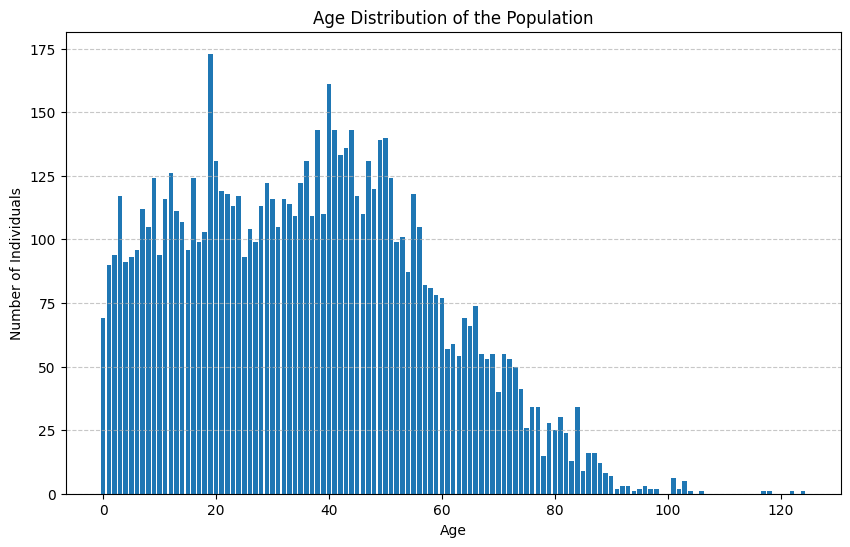

In [10]:
# Analyze age distribution
age_distribution = census_data_cleaned['Age'].value_counts().sort_index()

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.bar(age_distribution.index, age_distribution.values)
plt.title("Age Distribution of the Population")
plt.xlabel("Age")
plt.ylabel("Number of Individuals")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

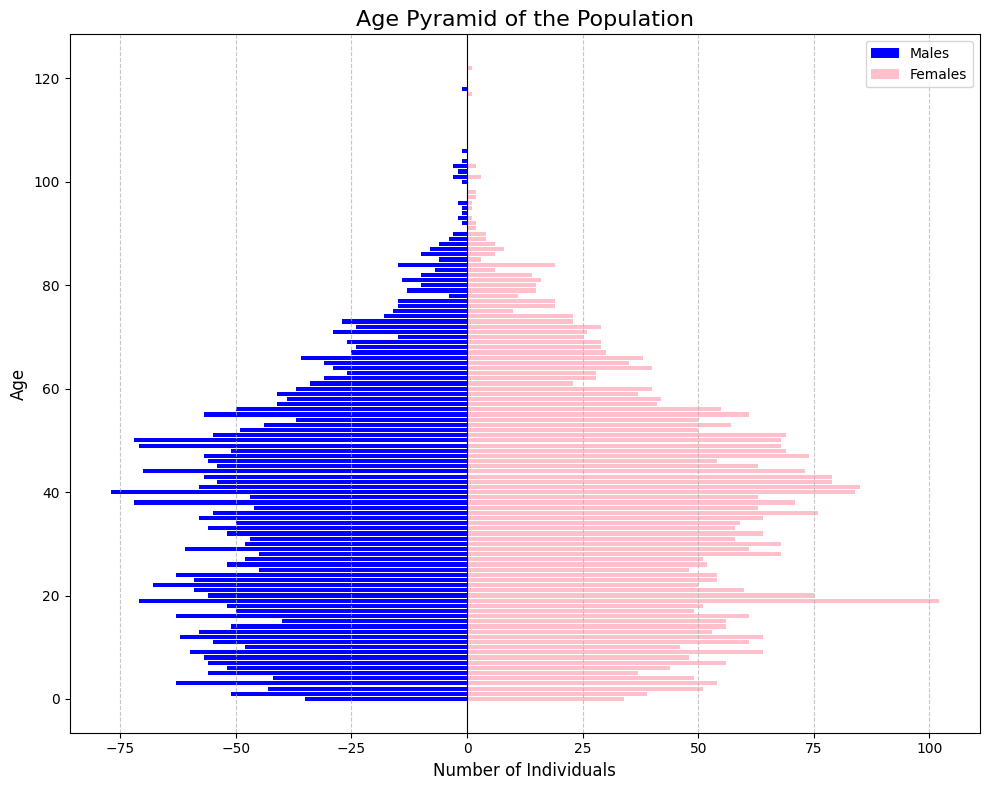

In [11]:
# Group the data by age and gender
age_gender_distribution = census_data.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

# Separate data for males and females to create the age pyramid
males = -age_gender_distribution['Male']  # Negative for pyramid representation
females = age_gender_distribution['Female']

# Plotting the age pyramid
plt.figure(figsize=(10, 8))
plt.barh(age_gender_distribution.index, males, color='blue', label='Males')
plt.barh(age_gender_distribution.index, females, color='pink', label='Females')
plt.title("Age Pyramid of the Population", fontsize=16)
plt.xlabel("Number of Individuals", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.axvline(0, color='black', linewidth=0.8)  # Centerline for visual distinction
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Task a(iii)

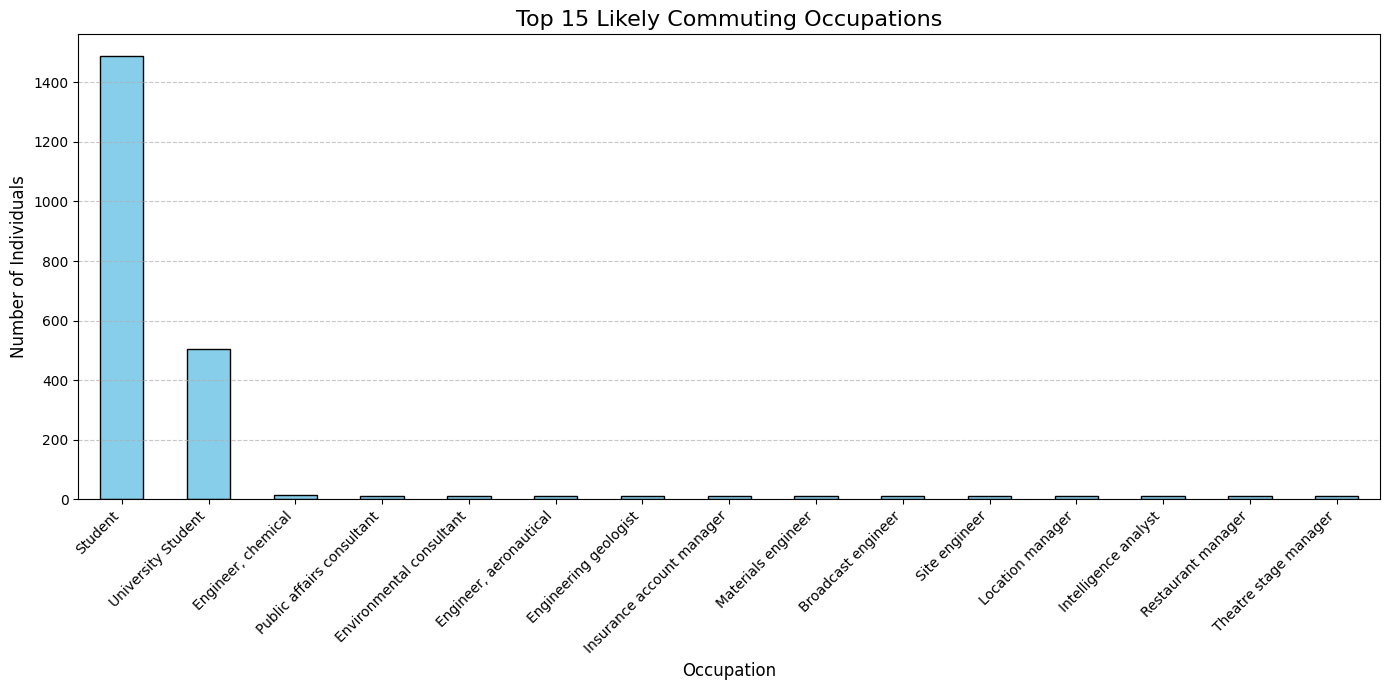

In [12]:
# Analyze occupations to identify potential commuters
occupation_counts = census_data_cleaned['Occupation'].value_counts()

# Filter occupations likely to commute (like high-skill urban jobs or students)
likely_commuting_jobs = ['Engineer', 'Student', 'Consultant', 'Manager', 'Architect', 'Analyst']
commuter_occupation_counts = occupation_counts[occupation_counts.index.str.contains('|'.join(likely_commuting_jobs), case=False)]

# Plotting the distribution of likely commuters with improved visualization
plt.figure(figsize=(14, 7))
commuter_occupation_counts.sort_values(ascending=False).head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 15 Likely Commuting Occupations", fontsize=16)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Count the various values under the 'Occupation' column
occupation_counts_summary = census_data_cleaned['Occupation'].value_counts()

# Display the total number of unique occupations and top 10 counts for inspection
total_unique_occupations = occupation_counts_summary.shape[0]
occupation_counts_summary.head(10), total_unique_occupations


(Occupation
 Student               1487
 Unemployed             535
 University Student     503
 Child                  461
 Proofreader             15
 Illustrator             14
 Engineer, chemical      14
 Bookseller              14
 Sports coach            14
 Personnel officer       13
 Name: count, dtype: int64,
 1053)

## Task a(iv)

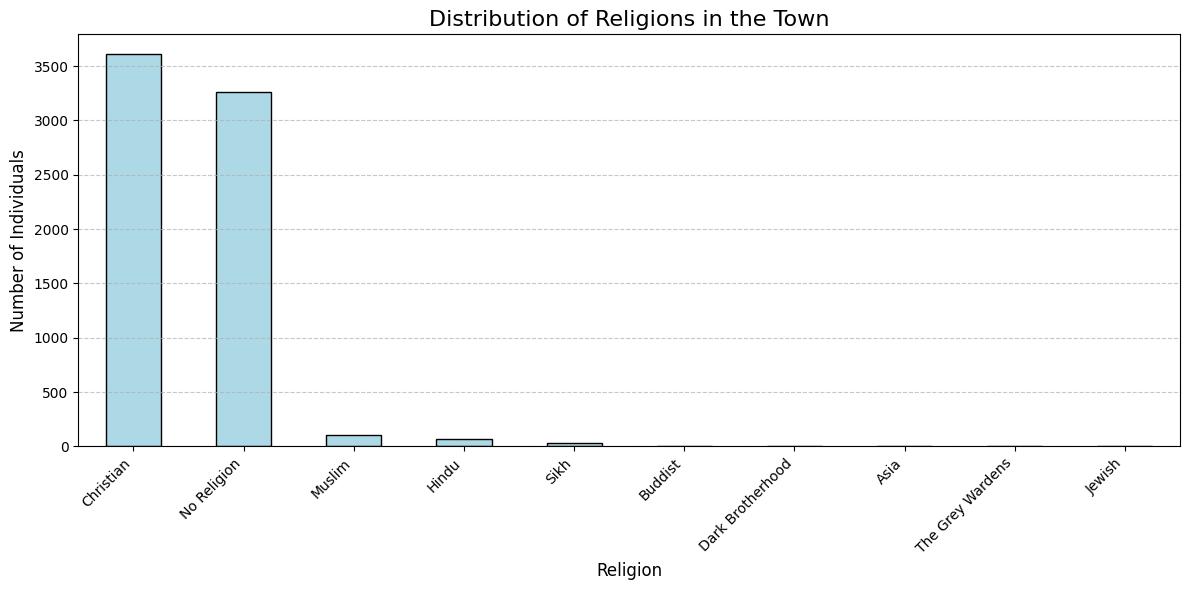

Religion
Christian           3612
No Religion         3266
Muslim               103
Hindu                 69
Sikh                  36
Buddist                2
Dark Brotherhood       2
Asia                   2
The Grey Wardens       2
Jewish                 1
Name: count, dtype: int64

In [14]:
# Analyze the 'Religion' column for distribution
religion_counts = census_data['Religion'].value_counts()

# Plot the religion distribution
plt.figure(figsize=(12, 6))
religion_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Distribution of Religions in the Town", fontsize=16)
plt.xlabel("Religion", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the counts for detailed analysis
religion_counts

## Task a(v)

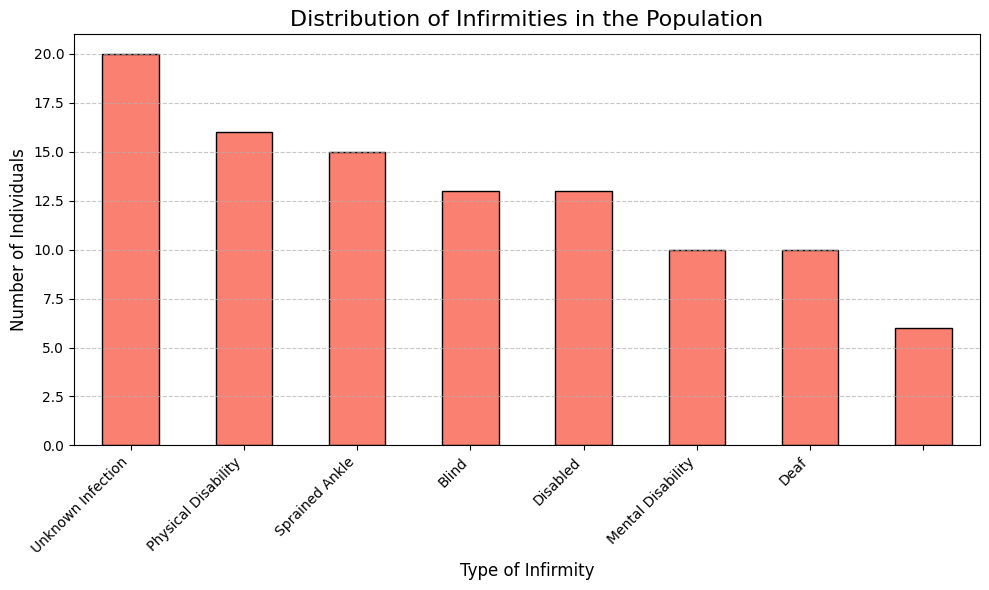

Number of females of childbearing age (18-40): 1454
Infirmity distribution:
Infirmity
Unknown Infection      20
Physical Disability    16
Sprained Ankle         15
Blind                  13
Disabled               13
Mental Disability      10
Deaf                   10
                        6
Name: count, dtype: int64


In [15]:
# Analyze the 'Infirmity' column for healthcare needs
infirmity_counts = census_data['Infirmity'].value_counts()

# Analyze the age group most relevant for potential pregnancies (18-40 years old)
potential_pregnancies = census_data[
    (census_data['Age'] >= 18) & (census_data['Age'] <= 40) & (census_data['Gender'] == 'Female')
]

# Plot the infirmity distribution
plt.figure(figsize=(10, 6))
infirmity_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Distribution of Infirmities in the Population", fontsize=16)
plt.xlabel("Type of Infirmity", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Output summary
print("Number of females of childbearing age (18-40):", potential_pregnancies.shape[0])
print("Infirmity distribution:")
print(infirmity_counts)


## Some Analysis

#### Unemployment Trends

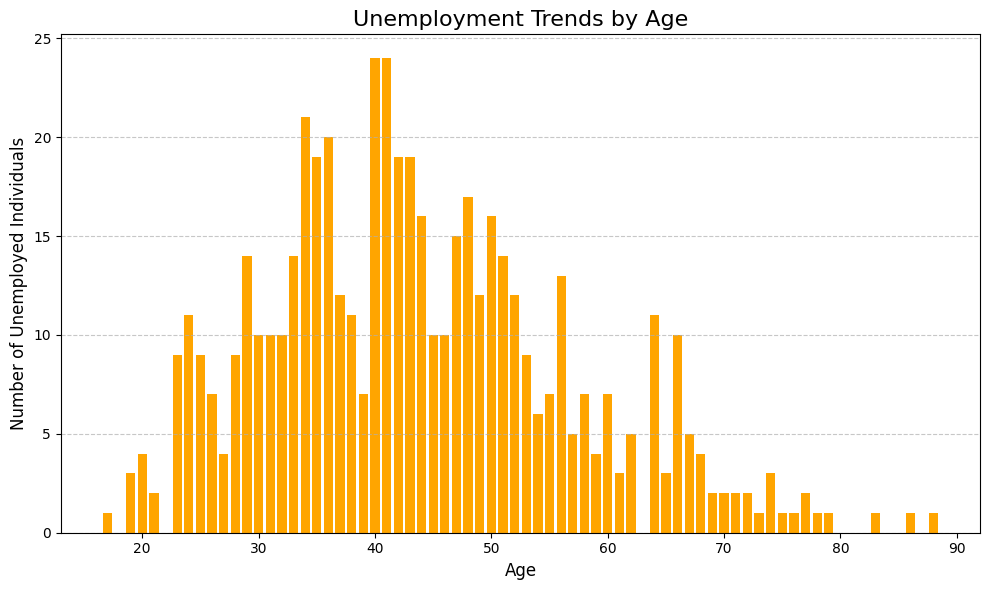

In [16]:
# Filter unemployed individuals
unemployed_data = census_data[census_data['Occupation'] == 'Unemployed']

# Group unemployment counts by age
unemployment_by_age = unemployed_data['Age'].value_counts().sort_index()

# Plot unemployment trends
plt.figure(figsize=(10, 6))
plt.bar(unemployment_by_age.index, unemployment_by_age.values, color='orange')
plt.title("Unemployment Trends by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Unemployed Individuals", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Divorce and Marriage Rate

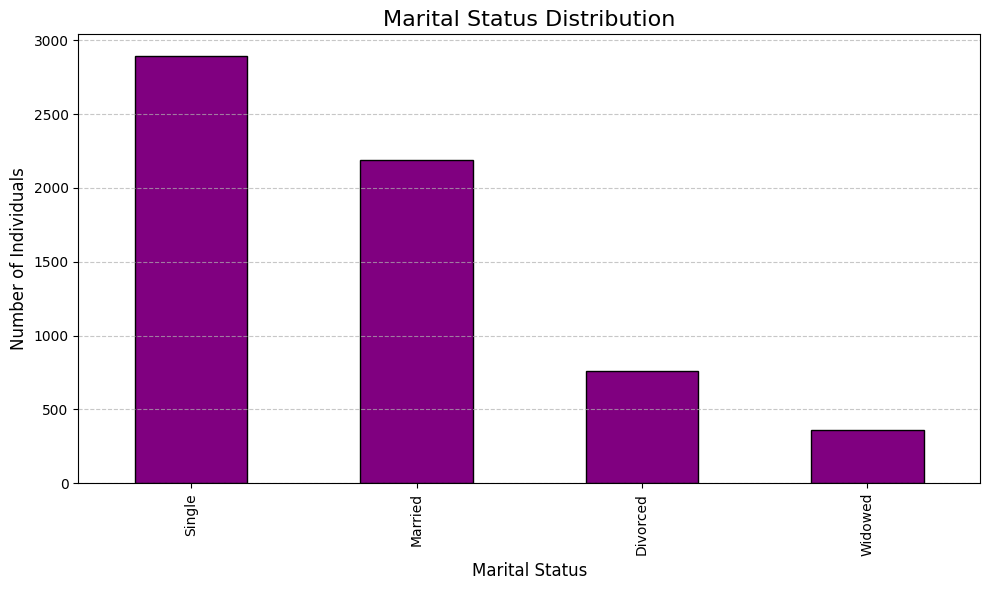

Marital Status
Single      2896
Married     2187
Divorced     763
Widowed      360
Name: count, dtype: int64

In [17]:
# Count the number of individuals by marital status
marital_status_counts = census_data['Marital Status'].value_counts()

# Plot marital status distribution
plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title("Marital Status Distribution", fontsize=16)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Number of Individuals", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

marital_status_counts


#### Occupancy Level

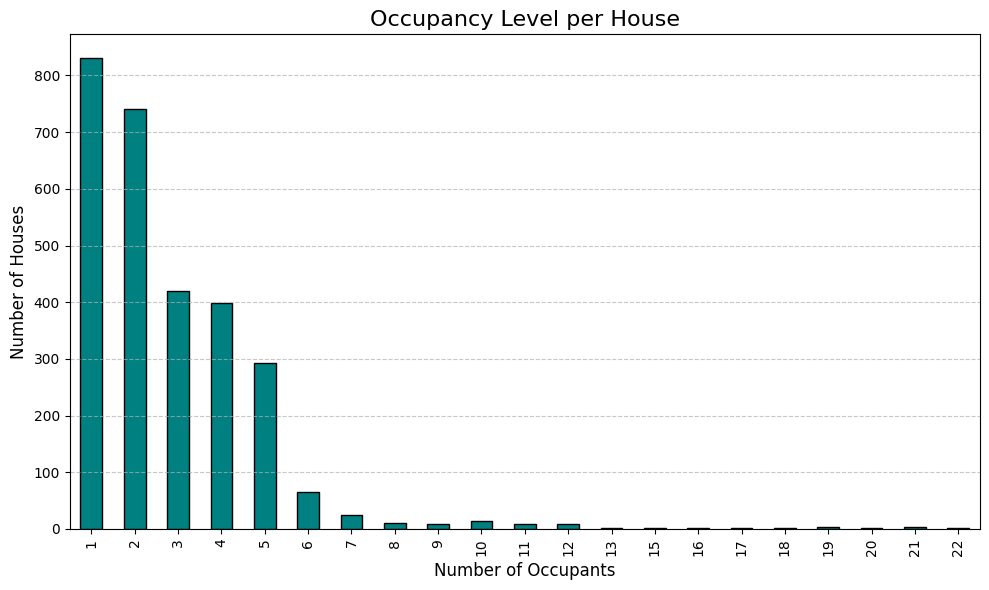

count    2841.000000
mean        2.822246
std         2.167561
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        22.000000
dtype: float64

In [18]:
# Group data by house and count the number of occupants per house
occupants_per_house = census_data.groupby(['House Number', 'Street']).size()

# Plot the occupancy distribution
plt.figure(figsize=(10, 6))
occupants_per_house.value_counts().sort_index().plot(kind='bar', color='teal', edgecolor='black')
plt.title("Occupancy Level per House", fontsize=16)
plt.xlabel("Number of Occupants", fontsize=12)
plt.ylabel("Number of Houses", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

occupants_per_house.describe()


#### University Students

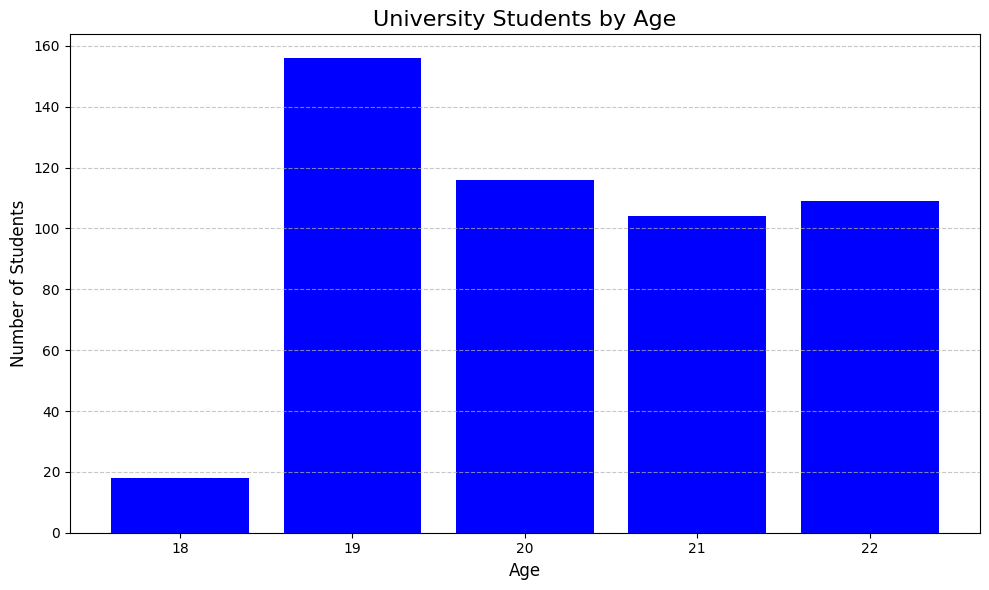

503

In [19]:
# Count the number of university students
university_students = census_data[census_data['Occupation'] == 'University Student']

# Group by age to analyze university student distribution
university_students_by_age = university_students['Age'].value_counts().sort_index()

# Plot university student trends
plt.figure(figsize=(10, 6))
plt.bar(university_students_by_age.index, university_students_by_age.values, color='blue')
plt.title("University Students by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

len(university_students)


#### Birth Rate and Death Rate

In [20]:
# Filter birth and death events from the dataset
births = census_data[census_data['Age'] == 0]  # age 0 implies newborns
deaths = census_data[census_data['Infirmity'] == 'Deceased']  # a field for deceased

# Calculate rates
birth_rate = len(births) / len(census_data) * 1000  # Births per 1000 individuals
death_rate = len(deaths) / len(census_data) * 1000  # Deaths per 1000 individuals

# Display rates
print("Birth Rate: ", round(birth_rate, 2), " per 1000 individuals")
print("Death Rate: ", round(death_rate, 2), " per 1000 individuals")


Birth Rate:  8.61  per 1000 individuals
Death Rate:  0.0  per 1000 individuals
